In [19]:
import os
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import napari

import sys
sys.path.append(r'../')

from tools import imgLoad
from tools import osTool as tos
from SegTools import Blocks, Segmentation

# Load data

In [2]:
basedir = r"Y:\People\Yannan\Segmentation\pLSMTH1\CSal3722_restitch"
probTH = imgLoad.loadVirtualTifSeq(basedir + r"\regionSpecificTraining\lowFPProb\*.tif")
imgTH = imgLoad.loadVirtualTifSeq(basedir + r"\data\*.tif")

masks = [imgLoad.loadVirtualTifSeq(r"W:\People\Yannan\Segmentation\DF16\regionalMask\aroundHind\mask\*.tif"),
        ]

(5568, 3960, 1140)
(5568, 3960, 1140)
(5568, 3960, 1140)


# Set blocks

Block Number (x,y,z):  [6 5 5]


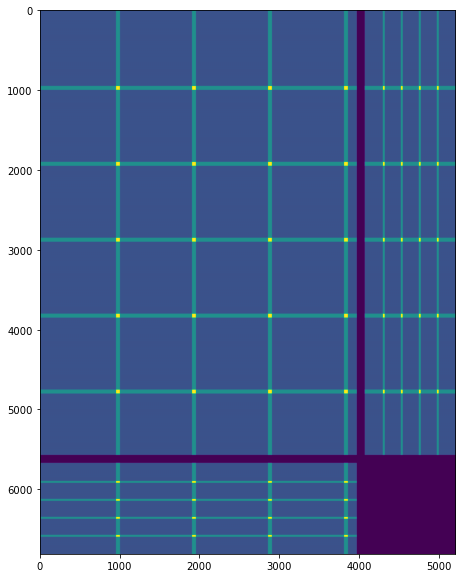

In [3]:
blocks = Blocks(probTH.shape, (1000, 1000, 250), (50, 50, 25))
blocks.visualize()

In [4]:
segObj = Segmentation(imgTH, probTH, masks, blocks)

# Tune thresholds

In [6]:
# (3,0,1),(3,1,1),(4,1,2), (4,1,0)
thresholds = [0.2, 0.3]
blobs = segObj.segmentBlock([4,1,2], thresholds, onlyMask = False, min_sigma = [3, 3, 1], max_sigma = [5,5,5],)

Load data...
Blob detection (Mask 1)...
Detection: 80
Blob detection (Mask 2)...
Detection: 132


In [13]:
tos.saveNpy(r'Y:\People\Yannan\Segmentation\pLSMTH1\CSal3722_restitch\parameters.npy', \
           a = 1, b = 2, c = 3, d = 'aaaa')

In [18]:
np.load(r'Y:\People\Yannan\Segmentation\pLSMTH1\CSal3722_restitch\parameters.npy', allow_pickle = True)

array({'a': 1, 'b': 2, 'c': 3, 'd': 'aaaa'}, dtype=object)

In [7]:
%gui qt

viewer = napari.view_image(segObj.blockImg, contrast_limits=[0,8000], colormap = 'gray', order = [2, 0, 1], name = 'Img')
viewer.add_image(segObj.blockProb, contrast_limits=[0,255], colormap = 'red', blending = 'additive', name = 'Prob')
viewer.add_image(segObj.blockMasks[0], contrast_limits=[0,1], colormap = 'green', blending = 'additive', opacity = 0.3, name = 'Mask')
viewer.add_points(np.array([blobs.x, blobs.y, blobs.z]).T, size = 4, n_dimensional = True, face_color = 'red', name = 'colocal')


<Points layer 'colocal' at 0x27265bceaf0>

# Run segmentation

In [6]:
allBlobs = segObj.segmentWhole(basedir, thresholds, onlyMask = False, min_sigma = [3, 3, 1], max_sigma = [5,5,5],)
# allBlobs.to_csv(basedir + r"\results.csv")


AssertionError: Masks number (3) unequal to thresholds number (2)

In [8]:
# allBlobs = segObj.loadBlockResults(basedir)
# allBlobs.to_csv(basedir + r"\results.csv")
allBlobs

,Unnamed: 0,x,y,z,rx,ry,rz,mask
0,150,935.0,799.0,44.0,2.0,2.0,1.0,2.0
1,151,960.0,948.0,165.0,2.0,2.0,1.0,2.0
2,152,828.0,886.0,53.0,2.0,2.0,1.0,2.0
3,157,424.0,914.0,209.0,2.0,2.0,1.0,2.0
4,158,520.0,855.0,105.0,2.0,2.0,1.0,2.0
...,...,...,...,...,...,...,...,...
3,3,1844.0,1034.0,691.0,2.0,2.0,1.0,2.0
4,4,1398.0,1551.0,733.0,2.0,2.0,1.0,2.0
5,6,1398.0,1552.0,728.0,2.0,2.0,1.0,2.0
0,0,1968.0,1299.0,701.0,2.0,2.0,1.0,2.0


In [196]:
%gui qt

viewer = napari.view_image(imgTH, contrast_limits=[0,10000], colormap = 'gray',  scale = [1,1,2], name = 'Img')
viewer.add_points(np.array([allBlobs.x, allBlobs.y, allBlobs.z*2]).T, size = 15,\
                  symbol='ring', edge_width=0, \
                  n_dimensional = True, face_color = 'red', name = 'Cells')



<Points layer 'Cells' at 0x1fa7c5e2850>